# ANALYSIS OF INDIAN ELECTION USING TWITTER

This project on **Analysis of Indian Election using Twitter** is done using Python Programming Language and is basically an analysis of the tweets posted by the **Indian ahead and around  the lok sabha elections**.

The input for us in this project is a tweeter's tweet fetched from Twitter API and the output will be:

•	**Sentiment Analysis** of the tweets which will help us draw conclusion about the political orientation of the users.    

In [1]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

***pandas***(to create Dataframes)-for Data Representation,***numpy***(for compulation on dataframe),***re***(for working with regrex),
***textblob***(for using NLP method to generate polarity and subjectivity)- for Data Pre-processing/cleaning and Data Anaysis;
***matplotlib***-for Data interpretation/visualization

In [2]:
# Generated keys and tokens from Twitter developers account
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"

In [3]:
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

In [4]:
# Taking input from user and searching tweets from twitter through twitter API 
text1=input("enter the subject")
text2=input("enter another subject")
text3=input("enter another subject")
tweet_data = api_connect.search(text1, count=100)
tweet_data1=api_connect.search(text2, count=100)
tweet_data2=api_connect.search(text3, count=100)

enter the subjectBJP
enter another subjectCONGRESS
enter another subjectAAP


In [5]:
# Reading tweets from Twitter for all inputs
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
df1=pd.DataFrame([tweet.text for tweet in tweet_data1], columns=['Tweets'])
df2=pd.DataFrame([tweet.text for tweet in tweet_data2], columns=['Tweets'])

# Analysis of Sentiment on Tweets posted(negative,positive and neutral)

Helper function to clean text since there are elements/tokens in our tweet's text which are not needed for the sentiment analysis like Twitter usernames,hashtages,retweets information gives by "RT: ",URL,etc

In [6]:
# function to clean tweets such that we are removing hashtages,mentions,retweets and links
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text

In [7]:
# Applying cleantxt function to all dataframes 
df['Tweets'] = df['Tweets'].apply(cleantxt)
df1['Tweets']=df1['Tweets'].apply(cleantxt)
df2['Tweets']=df2['Tweets'].apply(cleantxt)

Helper functions to find polarity and subjectivity of the tweets using textblob library.As per the documentation,

The sentiment property returns a namedtuple of the form **Sentiment(polarity,subjectivity)**.The polarity score is a 
float within the range[-1.0,1.0].The subjectivity is a float within the range [0.0,1.0] where 0.0 is very objectivity
and 1.0 is very subjectivity

In [8]:
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [9]:
# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
# Applying getsubjectivity and getpolarity functions on all dataframes
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df1['Subjectivity']=df1['Tweets'].apply(getsubjectivity)
df2['Subjectivity']=df2['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
df1['Polarity']=df1['Tweets'].apply(getpolarity)
df2['Polarity']=df2['Tweets'].apply(getpolarity)

In [11]:
# function to get analysis
def getAnalysis(x):
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'

In [12]:
#Applying getAnalsysis function on polrity of dataframes
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)

In [13]:
# Counting the positive and neutral tweets
c1=c2=c3=0
for i in range(len(df)) :
    if(df.loc[i,"Polarity"]>=0):
        c1=c1+1
for i in range(len(df1)) :
    if(df1.loc[i,"Polarity"]>=0):
        c2=c2+1
for i in range(len(df2)) :
    if(df2.loc[i,"Polarity"]>=0):
        c3=c3+1

In [14]:
# Counting which party has maximum winnig chance
if (c1>=c2)and(c1 >=c3):
   largest=c1
   print(text1+" has the maximum winning chances")
elif (c2>=c1) and (c2>=c3):
   largest=c2
   print(text2 + " has the maximum winning chances")
else:
   largest=c3
   print(text3 +" has the maximum winning chances")

BJP has the maximum winning chances


# REPRESENTATION OF DATAFRAMES AND DATAFRAMES IN GRAPHS 

enter 1 to show data frame of  BJP 

enter 2 to show data frame of  CONGRESS 

enter 3 to show data frame of  AAP 

enter 4 to show pie chart representation

enter 5 to show bar plot representation

4


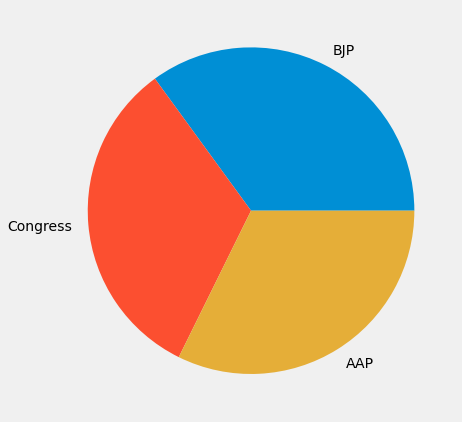

enter 1 to show data frame of  BJP 

enter 2 to show data frame of  CONGRESS 

enter 3 to show data frame of  AAP 

enter 4 to show pie chart representation

enter 5 to show bar plot representation

5


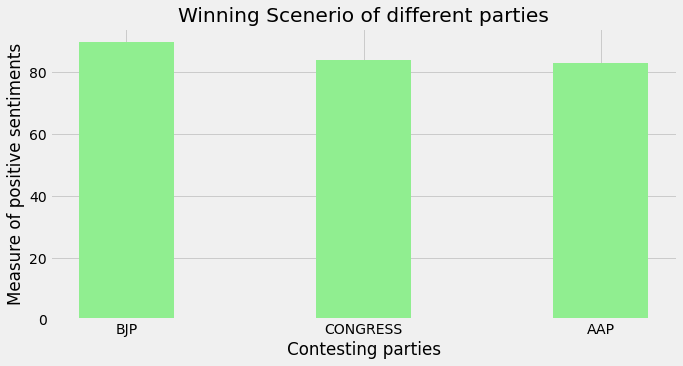

enter 1 to show data frame of  BJP 

enter 2 to show data frame of  CONGRESS 

enter 3 to show data frame of  AAP 

enter 4 to show pie chart representation

enter 5 to show bar plot representation

6


In [15]:
party=['BJP','Congress','AAP']
while(True):
    print("enter 1 to show data frame of ",text1,"\n")
    print("enter 2 to show data frame of ", text2,"\n")
    print("enter 3 to show data frame of ", text3,"\n")
    print("enter 4 to show pie chart representation\n")
    print("enter 5 to show bar plot representation\n")
    k=int(input())
    if(k==1):
        print(df)
    elif(k==2):
        print(df1)
    elif(k==3):
        print(df2)
    elif(k==4):
        data = [c1,c2,c3]
        # Creating plot
        fig = plt.figure(figsize=(10, 7))
        plt.pie(data, labels=party)
        # show plot
        plt.show()
    elif(k==5):
        data = {text1:c1,text2:c2,text3:c3}
        parties= list(data.keys())
        values = list(data.values())
        fig = plt.figure(figsize=(10, 5))
        # creating the bar plot
        plt.bar(parties, values, color='lightgreen',
                width=0.4)
        plt.xlabel("Contesting parties")
        plt.ylabel("Measure of positive sentiments")
        plt.title("Winning Scenerio of different parties")
        plt.show()
    elif(k==6):
        break